# Sample Data Ingest

In [1]:
prototyping_datafolder=r"C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV"

In [2]:
from os import listdir,path
import pandas as pd

In [3]:
data_set=dict()
for datafolder in listdir(prototyping_datafolder):
    for sample in listdir(path.join(prototyping_datafolder,datafolder)):
        entry=dict()
        entry["dataset"]=datafolder
        entry["path"]=path.join(prototyping_datafolder,datafolder,sample)
        data_set[sample]=entry
df=pd.DataFrame(data_set).T
df

dataset                                               path
sample_hdf0.tif  data_hdf  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_hdf1.tif  data_hdf  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_hdf2.tif  data_hdf  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_hdf3.tif  data_hdf  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_hov0.tif  data_hov  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_hov1.tif  data_hov  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_hov2.tif  data_hov  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_hov3.tif  data_hov  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_ldf0.tif  data_ldf  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_ldf1.tif  data_ldf  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_ldf2.tif  data_ldf  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_ldf3.tif  data_ldf  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_lov0.tif  data_lov  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_lov1.tif  data_lov  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_lov2.tif  data_lov  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_lov3.tif  data_lov  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_lro0.jpg  data_lro  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_lro1.jpg  data_lro  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_lro2.jpg  data_lro  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_lro3.jpg  data_lro  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_nov0.tif  data_nov  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_nov1.tif  data_nov  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_nov2.tif  data_nov  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_nov3.tif  data_nov  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_sem0.tif  data_sem  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_sem1.tif  data_sem  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_sem2.tif  data_sem  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_sem3.tif  data_sem  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_sem4.tif  data_sem  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_sem5.tif  data_sem  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...

In [4]:
print(df.iloc[0].path)
display(df[df.dataset=="data_nov"])

C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV\data_hdf\sample_hdf0.tif


dataset                                               path
sample_nov0.tif  data_nov  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_nov1.tif  data_nov  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_nov2.tif  data_nov  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_nov3.tif  data_nov  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...

# Image opening

In [5]:
from PIL import Image as PILImage

In [6]:
PILImage.open(df.iloc[0].path).show()

# Package Setups

## OpenCV

In [7]:
# https://docs.opencv.org/4.x/d5/de5/tutorial_py_setup_in_windows.html
# https://pypi.org/project/opencv-python/#manual-builds
# %pip install opencv-python
import cv2 as cv

In [ ]:
# https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html
# https://docs.opencv.org/4.x/db/d27/tutorial_py_table_of_contents_feature2d.html

### SIFT

In [ ]:
# SIFT https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html
import numpy as np
import cv2 as cv
 
img = cv.imread(df.iloc[0].path)
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
 
sift = cv.SIFT_create()
kp = sift.detect(gray,None)
 
# img=cv.drawKeypoints(gray,kp,img)
img=cv.drawKeypoints(gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
# cv.imshow('sift_keypoints',img)
PILImage.fromarray(img).show()
# display(PILImage.fromarray(img))

In [ ]:
kp,des = sift.compute(gray,kp)
display(des.shape)

### ORB

In [9]:
# https://docs.opencv.org/4.x/d1/d89/tutorial_py_orb.html
img = cv.imread(df.iloc[-2].path)
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)

# Initiate ORB detector
orb = cv.ORB_create(nfeatures=500,edgeThreshold=5)
 
# find the keypoints with ORB
kp = orb.detect(gray,None)
 
# compute the descriptors with ORB
kp, des = orb.compute(gray, kp)
 
# draw only keypoints location,not size and orientation
# img2 = cv.drawKeypoints(gray, kp, None, color=(0,255,0), flags=0)
img2=cv.drawKeypoints(gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
PILImage.fromarray(img2).show()
# PILImage.fromarray(img2).save("241210_ORB_sem3_nf500_et5.png")

In [10]:
display(des.shape)

(500, 32)

### Matcher

In [ ]:
# https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html

#### Brute-Force Matching w/ ORB

In [11]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
 
img1 = cv.imread(df.iloc[0].path,cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread(df.iloc[1].path,cv.IMREAD_GRAYSCALE) # trainImage
 
# Initiate ORB detector
orb = cv.ORB_create()
 
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

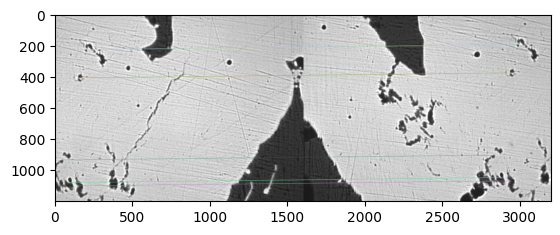

In [12]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
 
# Match descriptors.
matches = bf.match(des1,des2)
 
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
 
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
 
plt.imshow(img3)
plt.show()

In [13]:
kp2[matches[0].trainIdx].pt
kp1[matches[0].queryIdx].pt

(144.32260131835938, 1102.3260498046875)

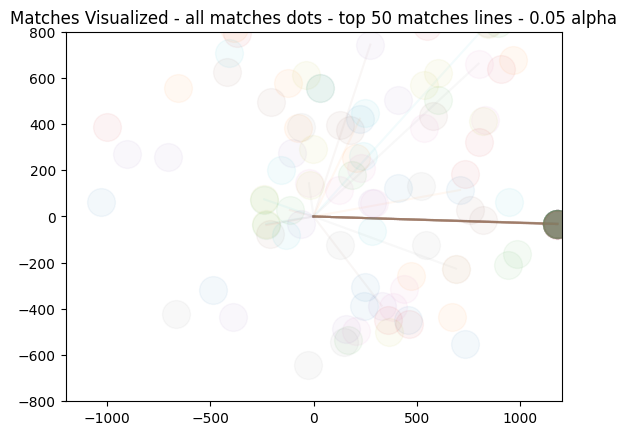

In [14]:
for i,match in enumerate(matches[:]):
    train_pt=kp2[match.trainIdx].pt
    query_pt=kp1[match.queryIdx].pt
    x_offset=train_pt[0]-query_pt[0]
    y_offset=train_pt[1]-query_pt[1]
    # print([x_offset],[y_offset])
    # plt.plot([0,x_offset],[0,y_offset],alpha=0.1)
    plt.plot([x_offset],[y_offset],"o",alpha=0.05,markersize=20)
    if i<50:
        plt.plot([0,x_offset],[0,y_offset],alpha=0.05)
plt.xlim([-1200,1200])
plt.ylim([-800,800])
plt.title("Matches Visualized - all matches dots - top 50 matches lines - 0.05 alpha")
plt.show()

## SimpleCV

In [ ]:
# Paused to focus on moving forward with OpenCV

## Scikit-Image

In [ ]:
# Paused to focus on moving forward with OpenCV

# Set Processing

In [15]:
# set_df=df[df.dataset=="data_hdf"].copy() # 2x2 high distinct feature set
set_df=df[df.dataset=="data_sem"].copy() # 4x1 low overlap set
set_df

dataset                                               path
sample_sem0.tif  data_sem  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_sem1.tif  data_sem  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_sem2.tif  data_sem  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_sem3.tif  data_sem  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_sem4.tif  data_sem  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_sem5.tif  data_sem  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...

In [17]:
orb_data=dict()
for name,sample in set_df.iterrows():
    # print(sample)
    img = cv.imread(sample.path, cv.IMREAD_GRAYSCALE)
    orb = cv.ORB_create(edgeThreshold=5)
    kp, des = orb.detectAndCompute(img,None)
    orb_data[name]={"img":img,"kp":kp,"des":des}
orb_df=pd.DataFrame(orb_data).T
orb_df

img  \
sample_sem0.tif  [[192, 189, 157, 230, 230, 242, 233, 242, 248,...   
sample_sem1.tif  [[150, 158, 123, 82, 110, 130, 115, 138, 238, ...   
sample_sem2.tif  [[180, 215, 226, 129, 136, 181, 180, 189, 186,...   
sample_sem3.tif  [[233, 247, 244, 229, 242, 176, 224, 221, 184,...   
sample_sem4.tif  [[69, 83, 113, 148, 138, 109, 51, 102, 143, 14...   
sample_sem5.tif  [[153, 205, 140, 174, 189, 124, 154, 144, 163,...   

                                                                kp  \
sample_sem0.tif  (< cv2.KeyPoint 000001F506323B70>, < cv2.KeyPo...   
sample_sem1.tif  (< cv2.KeyPoint 000001F5062B3CF0>, < cv2.KeyPo...   
sample_sem2.tif  (< cv2.KeyPoint 000001F5025F7030>, < cv2.KeyPo...   
sample_sem3.tif  (< cv2.KeyPoint 000001F502600E70>, < cv2.KeyPo...   
sample_sem4.tif  (< cv2.KeyPoint 000001F502606C70>, < cv2.KeyPo...   
sample_sem5.tif  (< cv2.KeyPoint 000001F50260CAB0>, < cv2.KeyPo...   

                                                               des  
sample_sem0.tif  [[3, 159, 198, 157, 50, 146, 188, 230, 188, 20...  
sample_sem1.tif  [[1, 141, 31, 190, 93, 205, 180, 231, 158, 19,...  
sample_sem2.tif  [[145, 213, 127, 221, 182, 30, 239, 189, 84, 1...  
sample_sem3.tif  [[42, 179, 172, 137, 157, 55, 153, 63, 86, 117...  
sample_sem4.tif  [[3, 140, 130, 153, 245, 189, 248, 103, 223, 7...  
sample_sem5.tif  [[1, 20, 141, 173, 44, 47, 232, 31, 86, 123, 2...

In [18]:
from itertools import combinations

sample_sem0.tif sample_sem1.tif


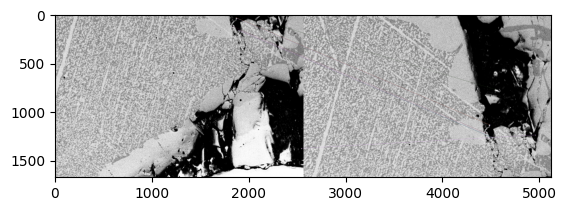

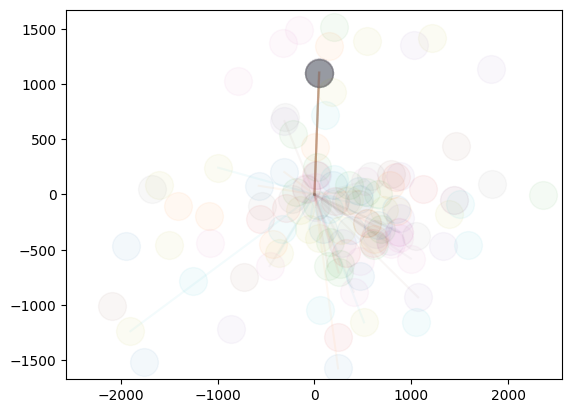

sample_sem0.tif sample_sem2.tif


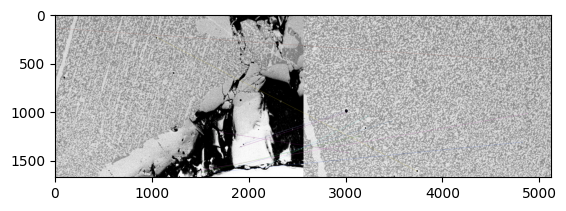

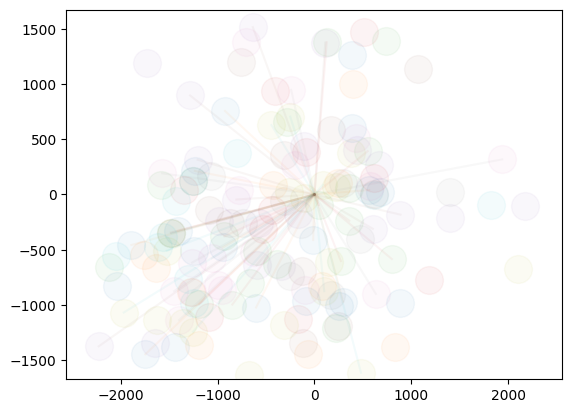

sample_sem0.tif sample_sem3.tif


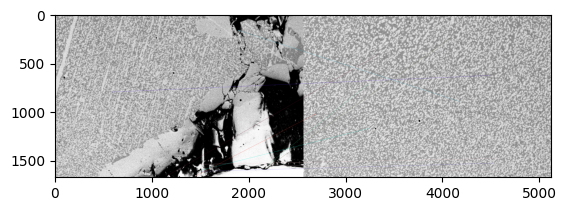

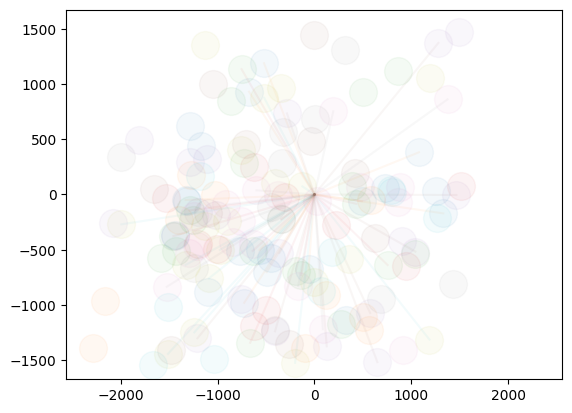

sample_sem0.tif sample_sem4.tif


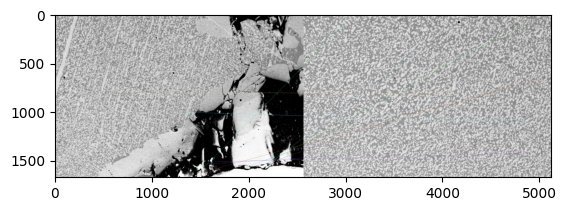

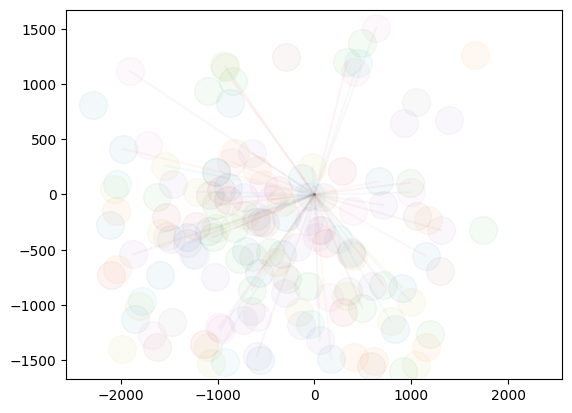

sample_sem0.tif sample_sem5.tif


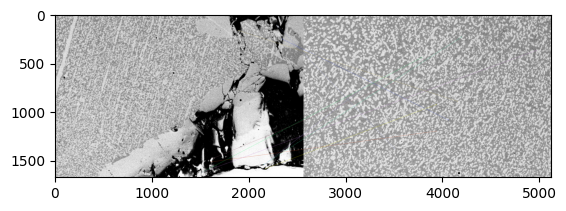

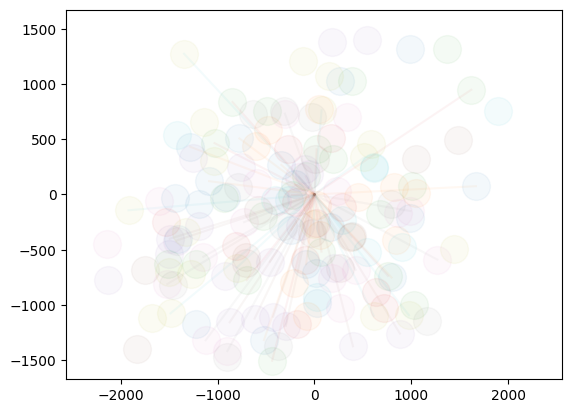

sample_sem1.tif sample_sem2.tif


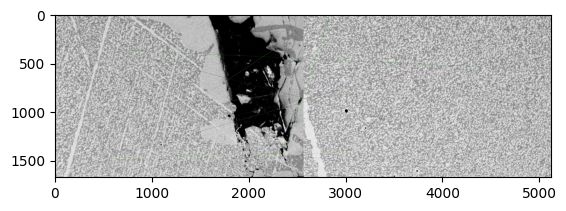

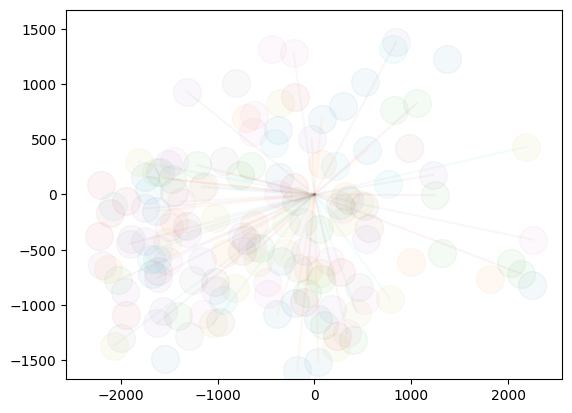

sample_sem1.tif sample_sem3.tif


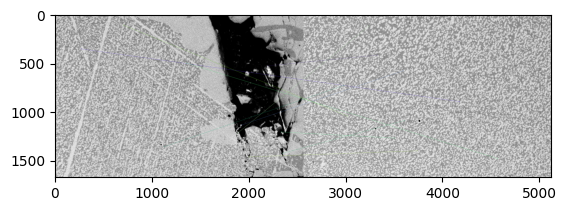

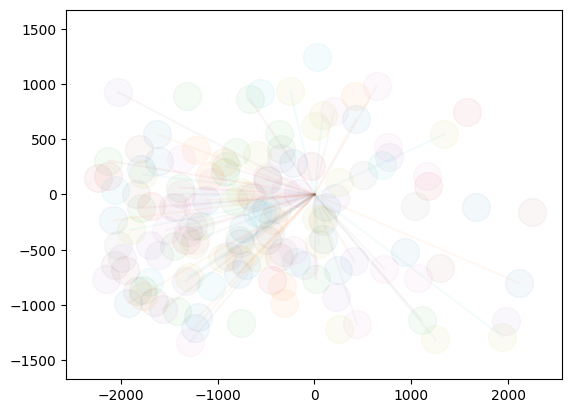

sample_sem1.tif sample_sem4.tif


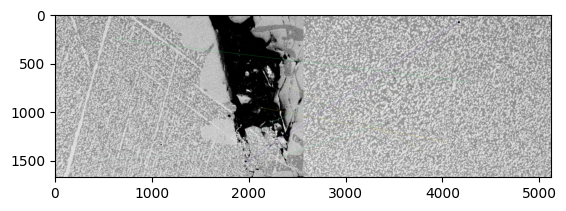

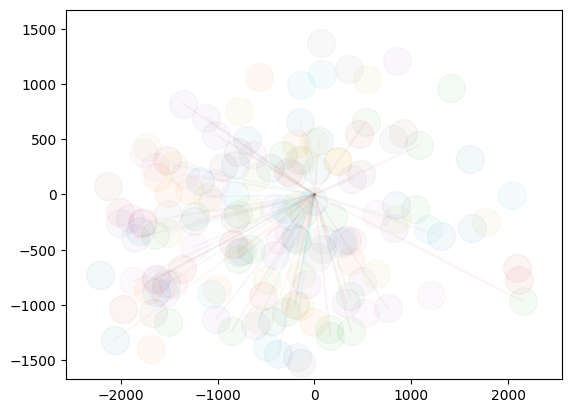

sample_sem1.tif sample_sem5.tif


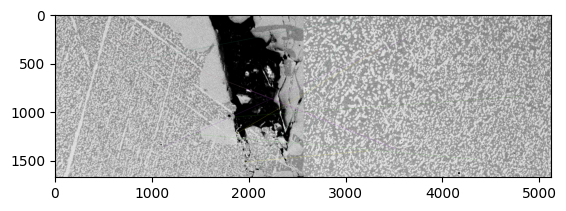

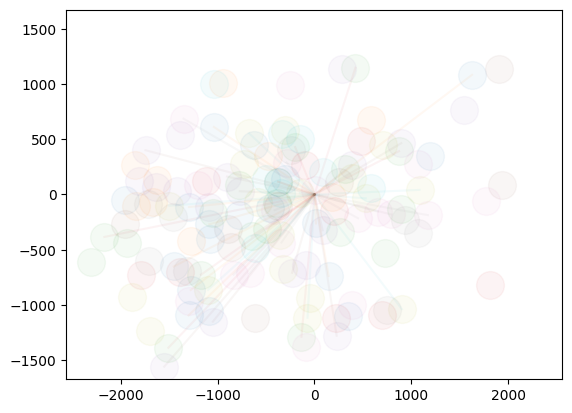

sample_sem2.tif sample_sem3.tif


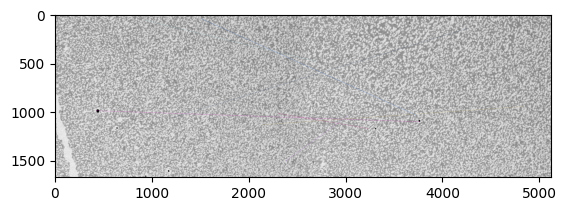

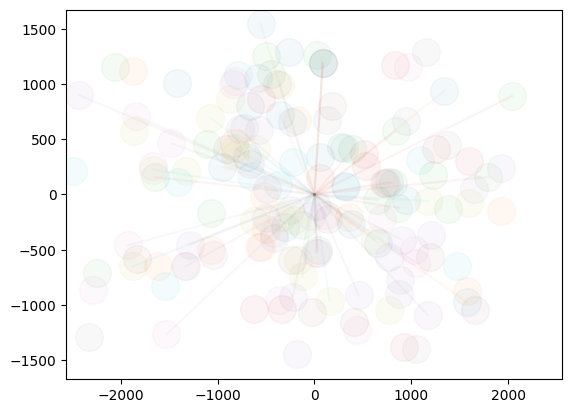

sample_sem2.tif sample_sem4.tif


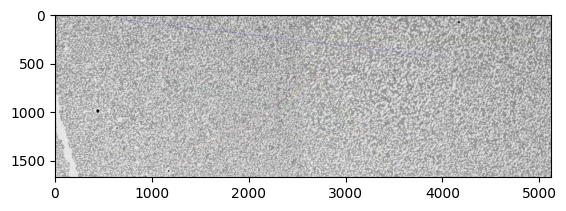

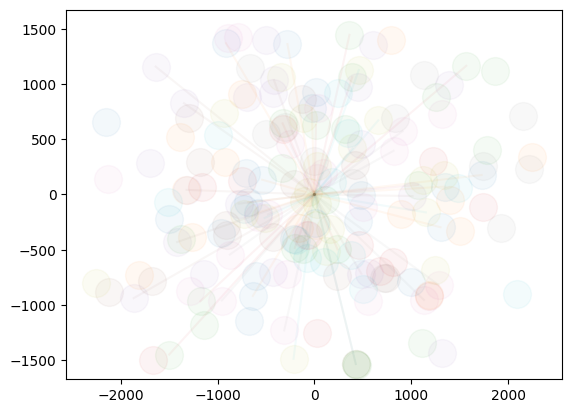

sample_sem2.tif sample_sem5.tif


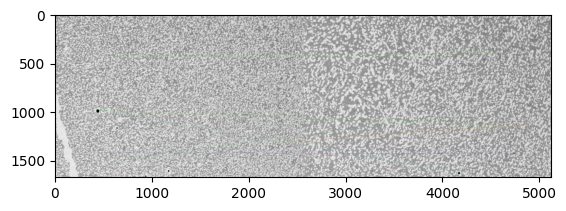

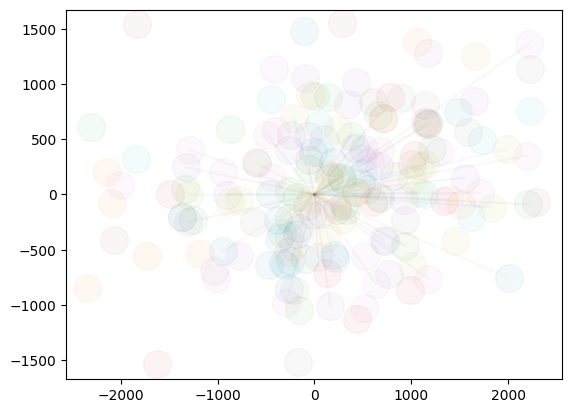

sample_sem3.tif sample_sem4.tif


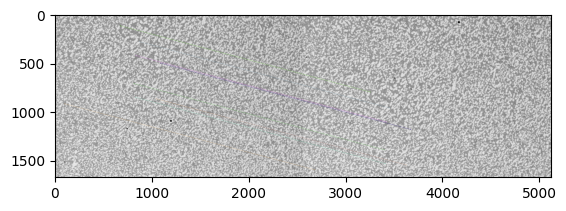

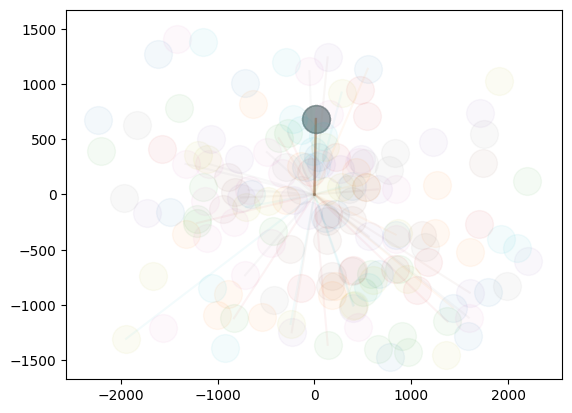

sample_sem3.tif sample_sem5.tif


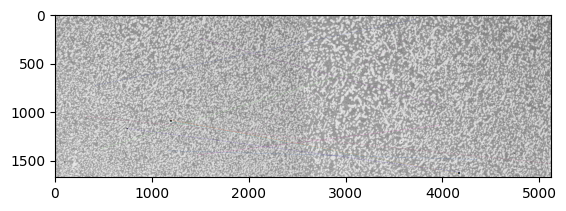

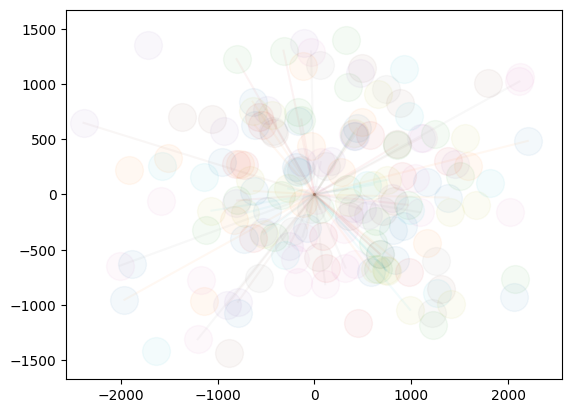

sample_sem4.tif sample_sem5.tif


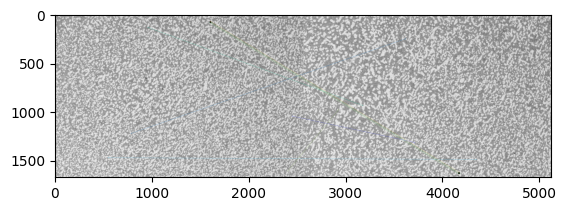

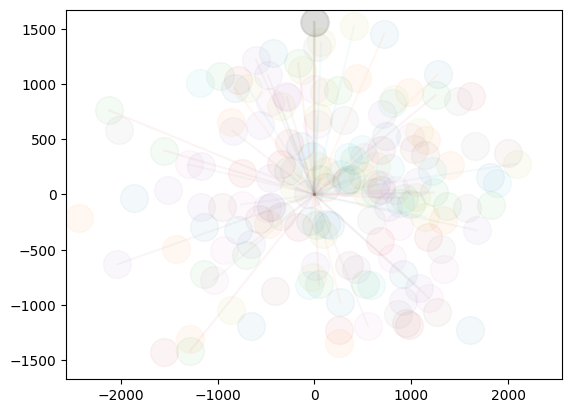

In [28]:
img_width=2560
img_height=1672
match_combs=combinations(set_df.index.to_list(),2)
# print(list(match_combs))
match_data=dict()
for m1,m2 in match_combs:
    print(m1,m2)
    bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
    matches = bf.match(orb_df["des"][m1],orb_df["des"][m2])
    matches = sorted(matches, key = lambda x:x.distance)
    img3 = cv.drawMatches(orb_df["img"][m1],orb_df["kp"][m1],orb_df["img"][m2],orb_df["kp"][m2],matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.imshow(img3)
    plt.savefig(f"241211_OCV_MOSet_{m1[7:11]}-{m2[10:11]}-matches.png",bbox_inches="tight",dpi=300)
    plt.show()
    for i,match in enumerate(matches[:]):
        train_pt=orb_df["kp"][m2][match.trainIdx].pt
        query_pt=orb_df["kp"][m1][match.queryIdx].pt
        x_offset=train_pt[0]-query_pt[0]
        y_offset=train_pt[1]-query_pt[1]
        plt.plot([x_offset],[y_offset],"o",alpha=0.05,markersize=20)
        if i<50:
            plt.plot([0,x_offset],[0,y_offset],alpha=0.05)
    plt.xlim([-img_width,img_width])
    plt.ylim([-img_height,img_height])
    plt.savefig(f"241211_OCV_MOSet_{m1[7:11]}-{m2[10:11]}-offsets.png",bbox_inches="tight")
    plt.show()

# Offset Determination

## Prototyping
- lro2-3 for clean-defined
- lro0-2 for fuzzy rotated
- lro1-2 for similar feature but no match
- hdf0-2 for corner barely match
- hdf0-1 for clean-defined
- hdf1-3 for clean-defined
- lov2-3 for fuzzy match
- lov1-2 for fuzzy match
- ldf0-3 for clean match w/ noise
- ldf2-3 for clean match w/ noise


In [22]:
samples_short=["sem0","sem1","sem2","sem3","sem4","sem5"]#["lro0","lro1","lro2","lro3","hdf0","hdf1","hdf2","hdf3","lov1","lov2","lov3","ldf0","ldf2","ldf3"]
samples=pd.DataFrame([df[df.index.str.contains(x)].iloc[0] for x in samples_short])
samples

dataset                                               path
sample_sem0.tif  data_sem  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_sem1.tif  data_sem  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_sem2.tif  data_sem  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_sem3.tif  data_sem  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_sem4.tif  data_sem  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_sem5.tif  data_sem  C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...

In [23]:
orb_data=dict()
for name,sample in samples.iterrows():
    # print(sample)
    img = cv.imread(sample.path, cv.IMREAD_GRAYSCALE)
    orb = cv.ORB_create(nfeatures=500,edgeThreshold=5)
    kp, des = orb.detectAndCompute(img,None)
    orb_data[name]={"img":img,"kp":kp,"des":des}
orb_df=pd.DataFrame(orb_data).T
orb_df

img  \
sample_sem0.tif  [[192, 189, 157, 230, 230, 242, 233, 242, 248,...   
sample_sem1.tif  [[150, 158, 123, 82, 110, 130, 115, 138, 238, ...   
sample_sem2.tif  [[180, 215, 226, 129, 136, 181, 180, 189, 186,...   
sample_sem3.tif  [[233, 247, 244, 229, 242, 176, 224, 221, 184,...   
sample_sem4.tif  [[69, 83, 113, 148, 138, 109, 51, 102, 143, 14...   
sample_sem5.tif  [[153, 205, 140, 174, 189, 124, 154, 144, 163,...   

                                                                kp  \
sample_sem0.tif  (< cv2.KeyPoint 000001F520ED5950>, < cv2.KeyPo...   
sample_sem1.tif  (< cv2.KeyPoint 000001F5027D2910>, < cv2.KeyPo...   
sample_sem2.tif  (< cv2.KeyPoint 000001F520BE2970>, < cv2.KeyPo...   
sample_sem3.tif  (< cv2.KeyPoint 000001F520BDC7B0>, < cv2.KeyPo...   
sample_sem4.tif  (< cv2.KeyPoint 000001F520B5E5B0>, < cv2.KeyPo...   
sample_sem5.tif  (< cv2.KeyPoint 000001F520BAB000>, < cv2.KeyPo...   

                                                               des  
sample_sem0.tif  [[3, 159, 198, 157, 50, 146, 188, 230, 188, 20...  
sample_sem1.tif  [[1, 141, 31, 190, 93, 205, 180, 231, 158, 19,...  
sample_sem2.tif  [[145, 213, 127, 221, 182, 30, 239, 189, 84, 1...  
sample_sem3.tif  [[42, 179, 172, 137, 157, 55, 153, 63, 86, 117...  
sample_sem4.tif  [[3, 140, 130, 153, 245, 189, 248, 103, 223, 7...  
sample_sem5.tif  [[1, 20, 141, 173, 44, 47, 232, 31, 86, 123, 2...

In [24]:
from scipy import ndimage

In [25]:
# match_combs=combinations(orb_df.index.to_list(),2)
# match_combs=(("lro2","lro3"),("lro0","lro2"),("lro1","lro2"),("hdf0","hdf2"),("hdf0","hdf1"),("hdf1","hdf3"),("lov2","lov3"),("lov1","lov2"),("ldf0","ldf3"),("ldf2","ldf3"))
# match_combs=(("sem0","sem1"),("sem2","sem3"),("sem3","sem4"),("sem4","sem5"),("sem3","sem5"))
match_combs=(("sem0","sem1"),("sem2","sem3"),("sem3","sem4"),("sem4","sem5"),("sem3","sem5"))
match_combs=[(df.index[df.index.str.contains(x[0])][0],df.index[df.index.str.contains(x[1])][0]) for x in match_combs]

match_combs

[('sample_sem0.tif', 'sample_sem1.tif'),
 ('sample_sem2.tif', 'sample_sem3.tif'),
 ('sample_sem3.tif', 'sample_sem4.tif'),
 ('sample_sem4.tif', 'sample_sem5.tif'),
 ('sample_sem3.tif', 'sample_sem5.tif')]

[8.0, 13.0, 13.0, 17.0, 21.0, 22.0, 22.0, 24.0, 25.0, 25.0, 25.0, 25.0, 26.0, 28.0, 28.0, 29.0, 30.0, 31.0, 32.0, 32.0, 34.0, 35.0, 35.0, 36.0, 37.0, 37.0, 38.0, 40.0, 41.0, 41.0, 41.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 45.0, 47.0, 47.0, 47.0, 47.0, 48.0, 48.0, 48.0, 48.0, 49.0, 49.0, 49.0, 50.0, 50.0, 50.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 52.0, 52.0, 52.0, 52.0, 53.0, 53.0, 53.0, 53.0, 54.0, 54.0, 55.0, 55.0, 55.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 58.0, 58.0, 58.0, 58.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 61.0, 61.0, 62.0, 62.0, 62.0, 62.0, 63.0, 63.0, 63.0, 64.0, 64.0, 64.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 66.0, 66.0, 66.0, 66.0, 67.0, 68.0, 68.0, 68.0, 69.0, 70.0, 71.0, 71.0, 71.0, 72.0, 72.0, 74.0, 75.0, 76.0, 81.0]
sample_sem0.tif sample_sem1.tif Offset: [  48 1101]


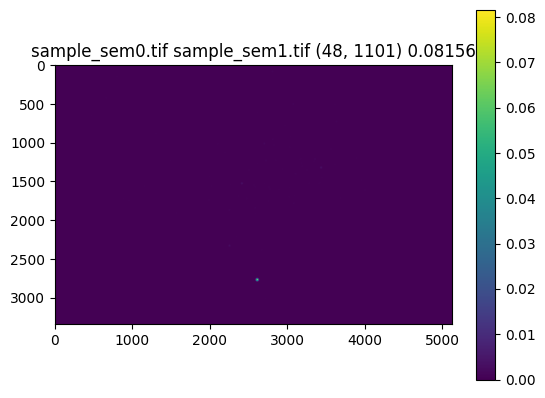

[35.0, 37.0, 37.0, 48.0, 50.0, 50.0, 51.0, 51.0, 51.0, 52.0, 52.0, 52.0, 53.0, 53.0, 53.0, 54.0, 54.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 58.0, 58.0, 59.0, 59.0, 59.0, 59.0, 59.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 61.0, 61.0, 61.0, 61.0, 61.0, 62.0, 62.0, 62.0, 62.0, 62.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 64.0, 64.0, 64.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 70.0, 70.0, 70.0, 70.0, 71.0, 71.0, 71.0, 71.0, 71.0, 71.0, 71.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 73.0, 73.0, 73.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 75.0, 76.0, 76.0, 76.0, 76.0, 76.0, 77.0, 77.0, 77.0, 77.0, 78.0, 78.0, 78.0, 79.0, 80.0, 80.0, 81.0, 83.0]
sample_sem2.tif sample_sem3.tif Offset: [  84 1192]


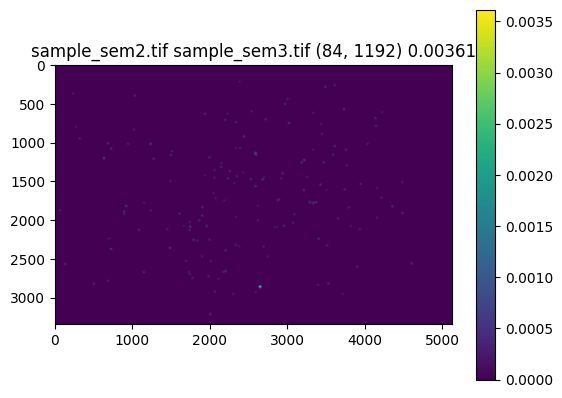

[26.0, 29.0, 32.0, 33.0, 33.0, 34.0, 35.0, 39.0, 42.0, 44.0, 45.0, 46.0, 47.0, 47.0, 48.0, 48.0, 49.0, 51.0, 51.0, 51.0, 52.0, 52.0, 52.0, 53.0, 53.0, 53.0, 53.0, 53.0, 54.0, 54.0, 54.0, 55.0, 55.0, 55.0, 55.0, 55.0, 56.0, 56.0, 56.0, 56.0, 57.0, 57.0, 57.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 60.0, 60.0, 60.0, 60.0, 60.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 69.0, 69.0, 69.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 71.0, 71.0, 71.0, 71.0, 71.0, 71.0, 72.0, 73.0, 73.0, 73.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 76.0, 76.0, 76.0, 76.0, 76.

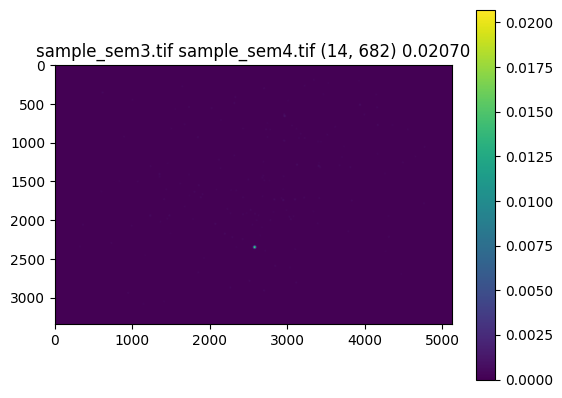

[26.0, 26.0, 38.0, 39.0, 45.0, 47.0, 48.0, 48.0, 48.0, 48.0, 49.0, 50.0, 50.0, 50.0, 51.0, 51.0, 51.0, 51.0, 52.0, 53.0, 53.0, 53.0, 53.0, 54.0, 54.0, 54.0, 54.0, 54.0, 55.0, 55.0, 56.0, 56.0, 57.0, 57.0, 57.0, 57.0, 57.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 59.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 71.0, 71.0, 71.0, 71.0, 71.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 73.0, 73.0, 73.0, 73.0, 73.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 75.0, 75.0, 75.0, 76.0, 76.0, 77.0, 77.0, 79.0, 80.0, 82.0, 83.0]
sam

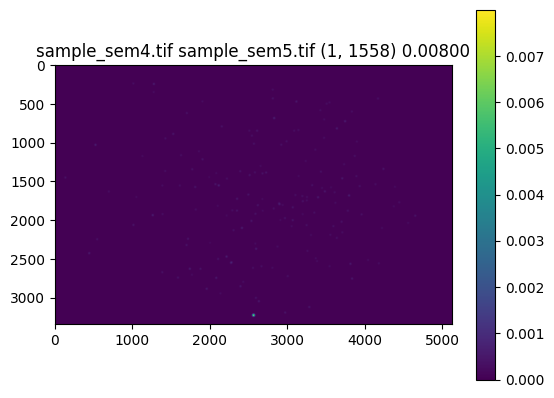

[42.0, 44.0, 48.0, 49.0, 50.0, 50.0, 50.0, 51.0, 51.0, 52.0, 52.0, 52.0, 52.0, 52.0, 53.0, 53.0, 53.0, 54.0, 54.0, 54.0, 54.0, 55.0, 55.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 57.0, 57.0, 58.0, 58.0, 58.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 62.0, 62.0, 62.0, 62.0, 63.0, 63.0, 63.0, 64.0, 64.0, 64.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 66.0, 66.0, 66.0, 66.0, 66.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 69.0, 69.0, 69.0, 69.0, 69.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 71.0, 71.0, 71.0, 71.0, 71.0, 71.0, 71.0, 71.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 75.0, 75.0, 75.0, 77.0, 77.0, 77.0, 77.0, 78.0, 78.0, 83.0, 88.0]
sam

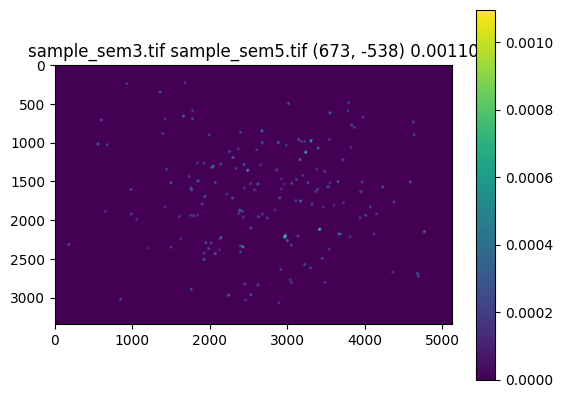

In [26]:
img_width=2560
img_height=1672
for m1,m2 in match_combs:
    bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
    matches = bf.match(orb_df["des"][m1],orb_df["des"][m2])
    matches = sorted(matches, key = lambda x:x.distance)
    print([m.distance for m in matches])
    offset_grid=np.zeros((2*img_width,2*img_height),dtype=float) # change this to match 2x image distance.(3200,2400)
    for i,match in enumerate(matches[:]):
        train_pt=orb_df["kp"][m2][match.trainIdx].pt
        query_pt=orb_df["kp"][m1][match.queryIdx].pt
        x_offset_adj=int(train_pt[0]-query_pt[0]+img_width) #1600/1200 centers in numpy array/image.
        y_offset_adj=int(train_pt[1]-query_pt[1]+img_height)
        offset_grid[x_offset_adj,y_offset_adj]+=1000/(match.distance**2)
    offset_grid=ndimage.gaussian_filter(offset_grid,10)
    print(m1,m2,"Offset:",np.array(np.unravel_index(np.argmax(offset_grid),offset_grid.shape))-np.array([img_width,img_height]))
    plt.title(" ".join([m1,m2,str(tuple(np.array(np.unravel_index(np.argmax(offset_grid),offset_grid.shape))-np.array([img_width,img_height]))),f"{offset_grid.max():.5f}"]))
    plt.imshow(offset_grid.T)
    plt.colorbar()
    plt.savefig(f"241210_OffsetMap_{m1[7:11]}-{m2[10:11]}-offmap-1000imds-g10_nf500_et5.png",bbox_inches="tight",dpi=300)
    plt.show()
    # img3 = cv.drawMatches(orb_df["img"][m1],orb_df["kp"][m1],orb_df["img"][m2],orb_df["kp"][m2],matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    # plt.imshow(img3)
    # plt.savefig(f"240815_OCV_MOSet_{m1[7:11]}-{m2[10:11]}-matches.png",bbox_inches="tight",dpi=300)
    # plt.show()
    # for i,match in enumerate(matches[:]):
    #     train_pt=orb_df["kp"][m2][match.trainIdx].pt
    #     query_pt=orb_df["kp"][m1][match.queryIdx].pt
    #     x_offset=train_pt[0]-query_pt[0]
    #     y_offset=train_pt[1]-query_pt[1]
    #     plt.plot([x_offset],[y_offset],"o",alpha=0.05,markersize=20)
    #     if i<50:
    #         plt.plot([0,x_offset],[0,y_offset],alpha=0.05)
    # plt.xlim([-1600,1600])
    # plt.ylim([-1200,1200])
    # plt.savefig(f"240815_OCV_MOSet_{m1[7:11]}-{m2[10:11]}-offsets.png",bbox_inches="tight")
    # plt.show()

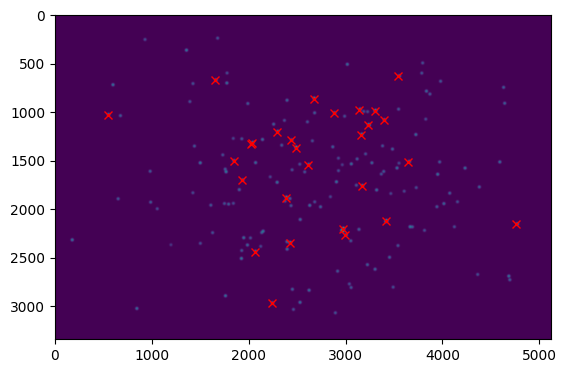

In [27]:
# testing way to get/compare local maxima. Code from `https://stackoverflow.com/questions/9111711/get-coordinates-of-local-maxima-in-2d-array-above-certain-value`
import numpy as np
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt


neighborhood_size = 50
threshold = 0.0005

data = offset_grid.T

data_max = ndimage.maximum_filter(data, neighborhood_size)
maxima = (data == data_max)
data_min = ndimage.minimum_filter(data, neighborhood_size)
diff = ((data_max - data_min) > threshold)
maxima[diff == 0] = 0

labeled, num_objects = ndimage.label(maxima)
xy = np.array(ndimage.center_of_mass(data, labeled, range(1, num_objects+1)))

plt.imshow(data)

plt.autoscale(False)
plt.plot(xy[:, 1], xy[:, 0], 'rx')


# Non-array/blended match>offset

In [36]:
len(matches)

142

In [ ]:
image_from="sample_sem0.tif"
image_to="sample_sem1.tif"
# sem 0 to sem 1: [48 1101] from offset map

matches = bf.match(orb_df["des"][image_from],orb_df["des"][image_to])

pts_from=np.array([orb_df["kp"][image_from][match.queryIdx].pt for match in matches])
pts_to=np.array([orb_df["kp"][image_to][match.trainIdx].pt for match in matches])

In [42]:
eAP2D=cv.estimateAffinePartial2D(pts_from,pts_to)


In [69]:
print("X,Y:",eAP2D[0][:,2])
#cos^2 + sin^2 = 1 >> rotation/scale component of matrix =s^2
print("Rotation & Scale Matrix:",eAP2D[0][:,:2])
eAP2D_scalex=(eAP2D[0][0,0]**2+eAP2D[0][0,1]**2)**0.5
eAP2D_scaley=(eAP2D[0][1,1]**2+eAP2D[0][1,0]**2)**0.5
print("Scale X,Y:",[eAP2D_scalex,eAP2D_scaley])
eAP2D_rotation=np.arctan(eAP2D[0][0,1]/eAP2D[0][1,1])
print("Rotation(Rad/Deg):",eAP2D_rotation,"/",eAP2D_rotation*180/np.pi)


X,Y: [  40.4832162  1124.55867397]
Rotation & Scale Matrix: [[ 1.00357659  0.01251139]
 [-0.01251139  1.00357659]]
Scale X,Y: [1.0036545731119408, 1.0036545731119408]
Rotation(Rad/Deg): 0.012466160275401317 / 0.7142583705141394


array([[ 1.00357659,  0.01251139],
       [-0.01251139,  1.00357659]])

In [56]:
print("Inliers:",np.sum(eAP2D[1]))
for pt_from,pt_to,in_out in zip(pts_from,pts_to,eAP2D[1]):
    if in_out:
        print("X,Y:",pt_from[0]-pt_to[0],pt_from[1]-pt_to[1])

Inliers: 16
X,Y: -48.0 -1101.6000366210938
X,Y: -46.0799560546875 -1103.040023803711
X,Y: -46.5599365234375 -1100.1600227355957
X,Y: -48.384033203125 -1102.4640502929688
X,Y: -50.1119384765625 -1100.7361297607422
X,Y: -46.656005859375 -1102.4640579223633
X,Y: -48.384033203125 -1102.4641036987305
X,Y: -47.69287109375 -1101.0817947387695
X,Y: -49.7664794921875 -1101.081802368164
X,Y: -47.69287109375 -1099.0081787109375
X,Y: -49.766357421875 -1102.3260650634766
X,Y: -49.7664794921875 -1102.3260345458984
X,Y: -49.766357421875 -1102.3259735107422
X,Y: -47.7757568359375 -1101.828384399414
X,Y: -47.7757568359375 -1101.8283309936523
X,Y: -46.581298828125 -1100.0368843078613
